<a href="https://colab.research.google.com/github/Vaishnavi-76304/Black-Friday/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
# Check basic statistics of dataset
print(df.describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

In [ ]:
#Check for missing values in the data

print(df.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [ ]:
# check for unique values in data
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
Marital_Status: [0 1]


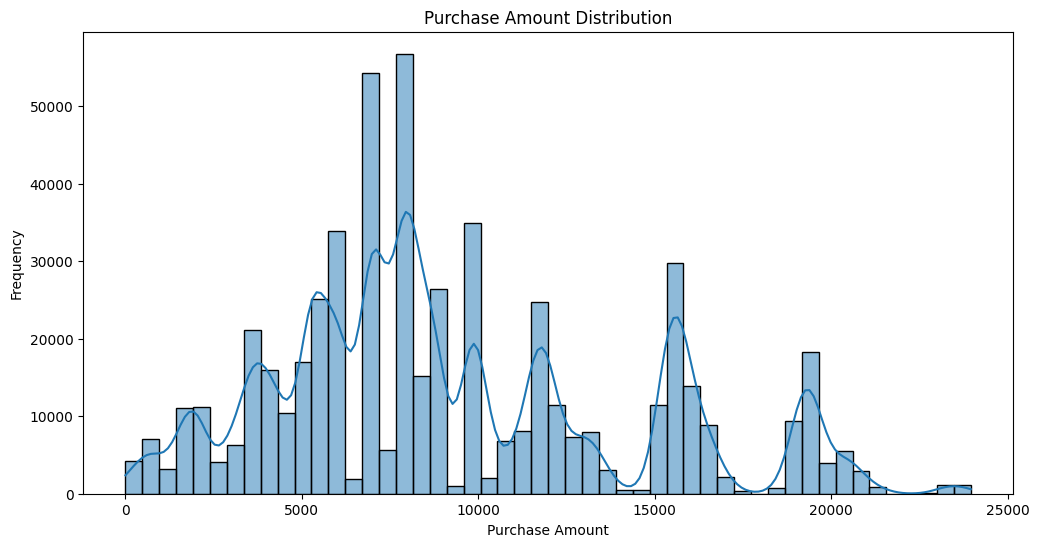

In [ ]:
# Perform EDA
plt.figure(figsize=(12,6))
sns.histplot(df['Purchase'], bins=50, kde=True)
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


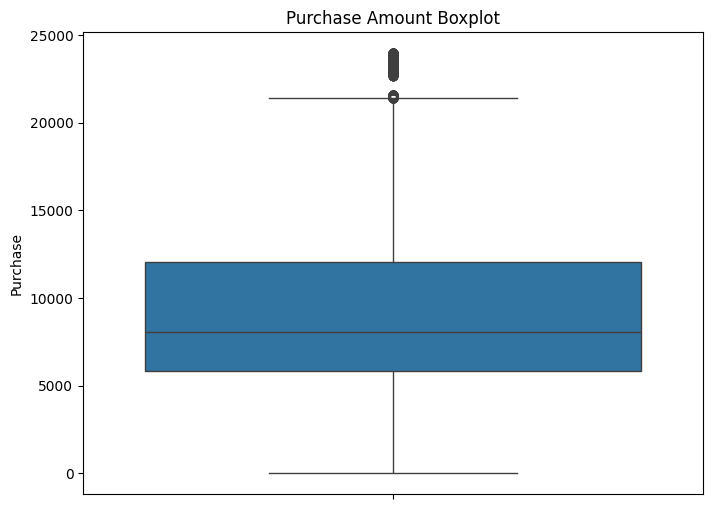

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Purchase', data=df)
plt.title('Purchase Amount Boxplot')
plt.show()

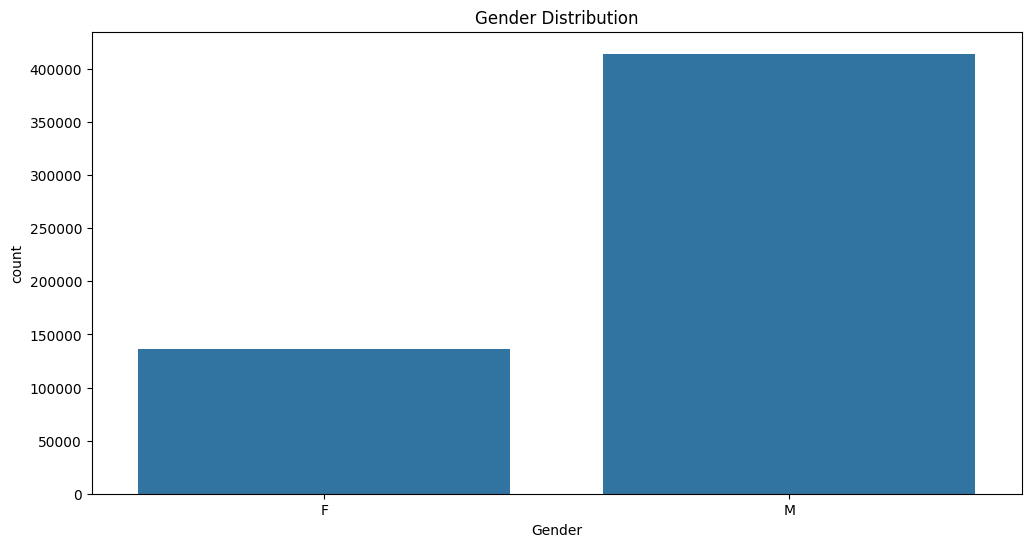

In [ ]:
# check for outliers
# Analysis by Gender, Marital Status, occupation, occupation vs purchase ,
# purchase by city, purchase by age group, etc

plt.figure(figsize=(12,6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

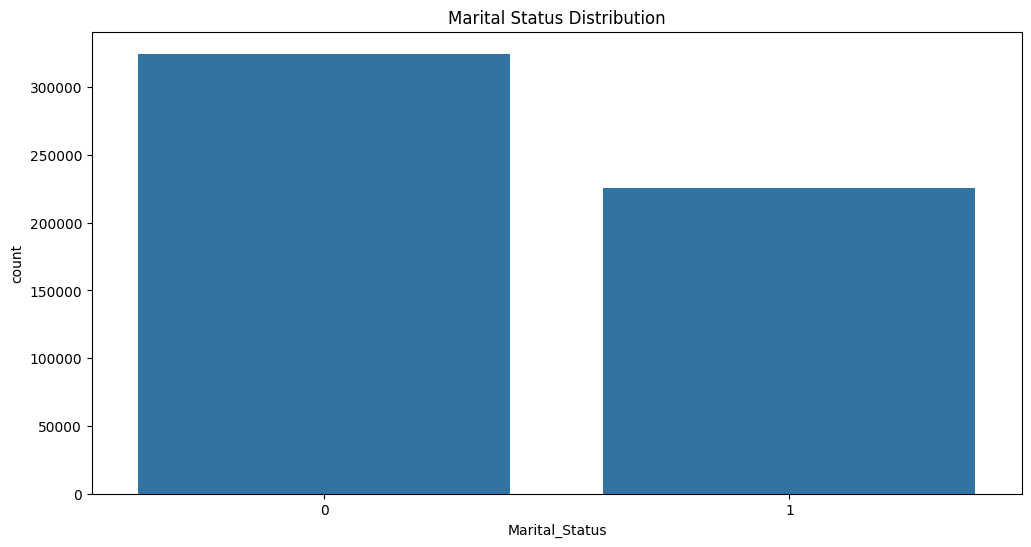

In [ ]:
# Marital status analysis
plt.figure(figsize=(12,6))
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status Distribution')
plt.show()


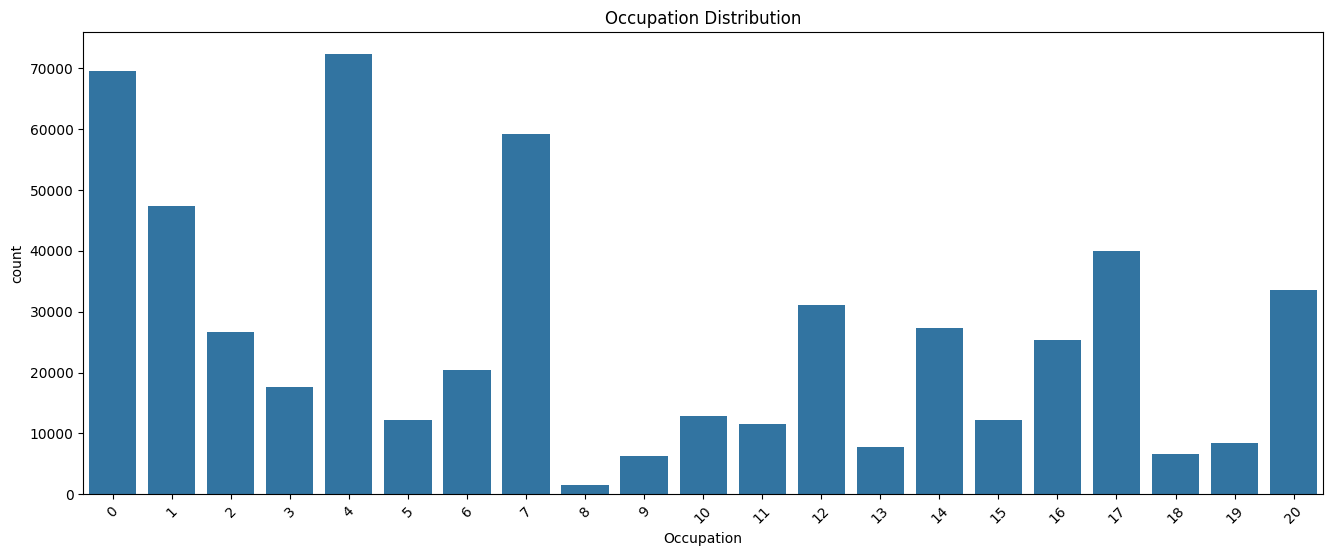

In [ ]:
# Occupation analysis
plt.figure(figsize=(16,6))
sns.countplot(x='Occupation', data=df)
plt.title('Occupation Distribution')
plt.xticks(rotation=45)
plt.show()

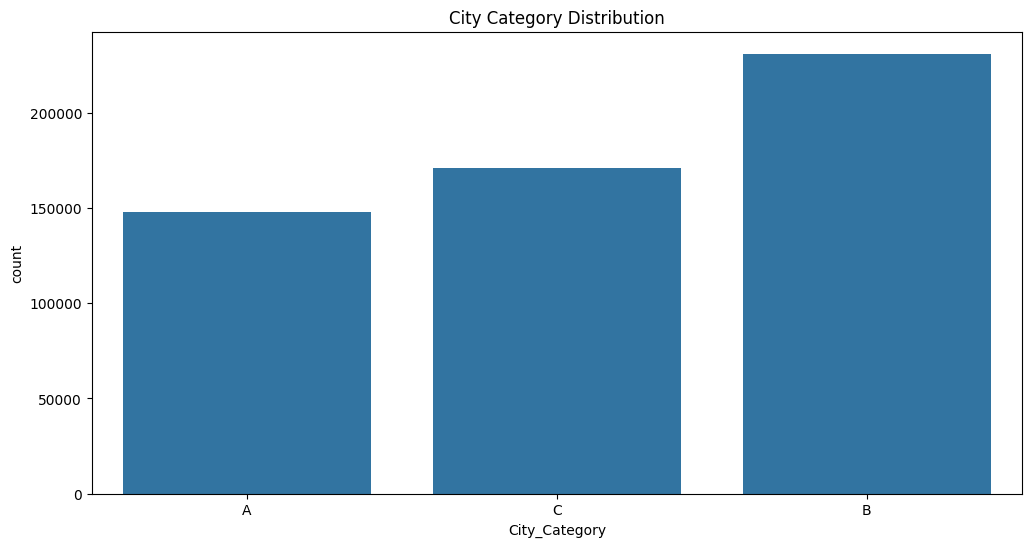

In [ ]:
# City category analysis
plt.figure(figsize=(12,6))
sns.countplot(x='City_Category', data=df)
plt.title('City Category Distribution')
plt.show()

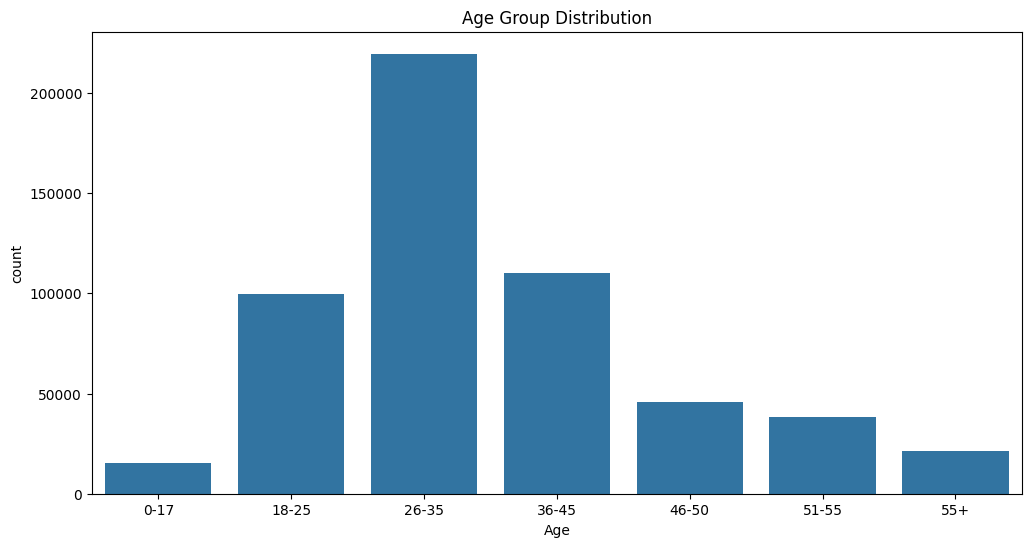

In [ ]:
# Age group analysis
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=df, order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'])
plt.title('Age Group Distribution')
plt.show()


In [ ]:
# Drop unnecessary fields
df = df.drop(['User_ID', 'Product_ID'], axis=1)


In [ ]:
# Convert categorical data into integer using map function (e.g 'Gender' column)
df['Gender'] = df['Gender'].map({'F':0, 'M':1})


In [ ]:
# missing value treatment
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)



In [ ]:
# Convert to integer
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

In [ ]:
# map range variables into integers (e.g 'Age' column)

age_map = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
df['Age'] = df['Age'].map(age_map)

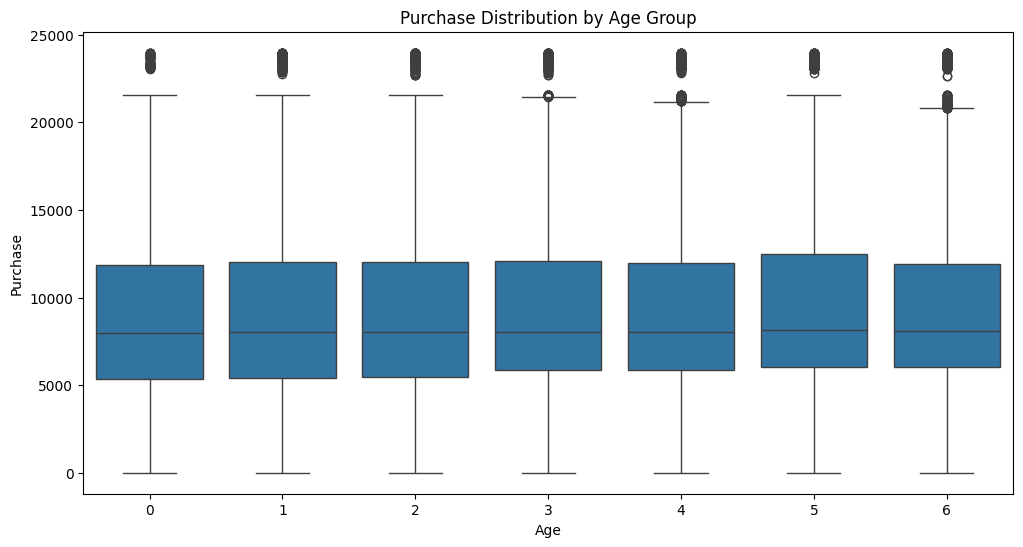

In [ ]:
# Data Visualization
# Age vs Purchased

plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Purchase Distribution by Age Group')
plt.show()

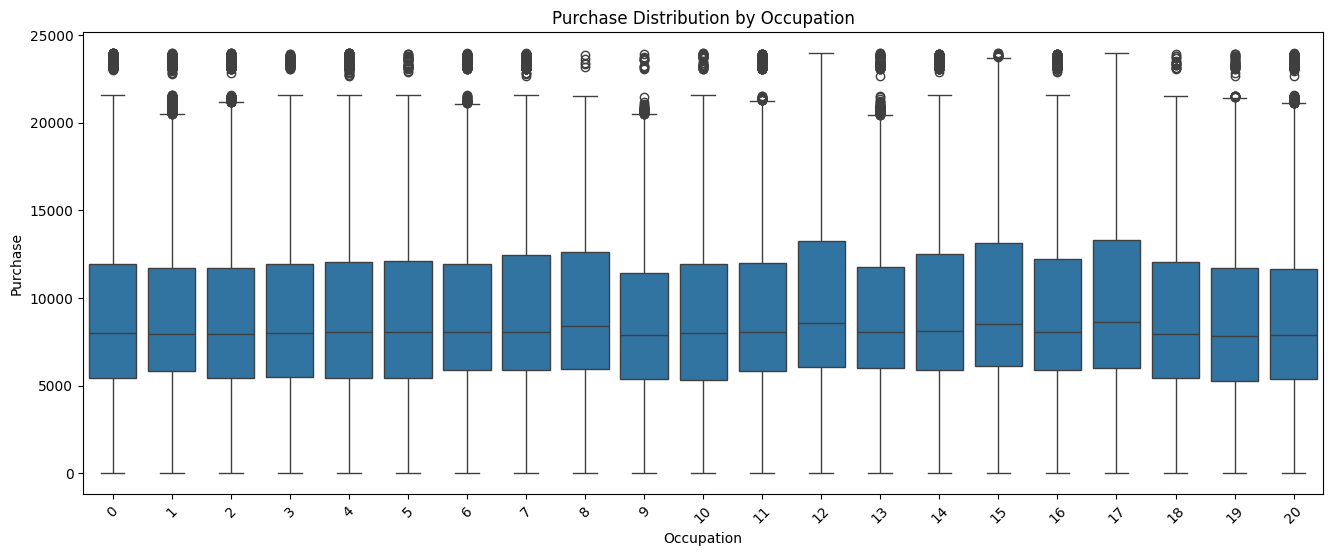

In [ ]:
# Occupation vs Purchased

plt.figure(figsize=(16,6))
sns.boxplot(x='Occupation', y='Purchase', data=df)
plt.title('Purchase Distribution by Occupation')
plt.xticks(rotation=45)
plt.show()

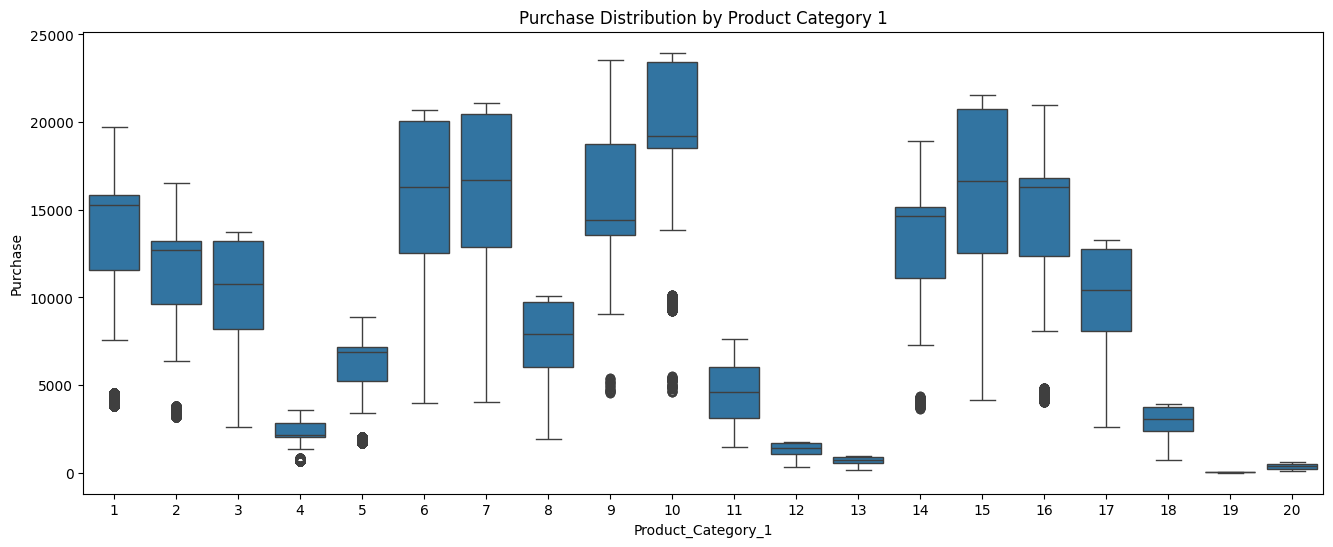

In [ ]:
# Product_category_1 vs Purchased

plt.figure(figsize=(16,6))
sns.boxplot(x='Product_Category_1', y='Purchase', data=df)
plt.title('Purchase Distribution by Product Category 1')
plt.show()

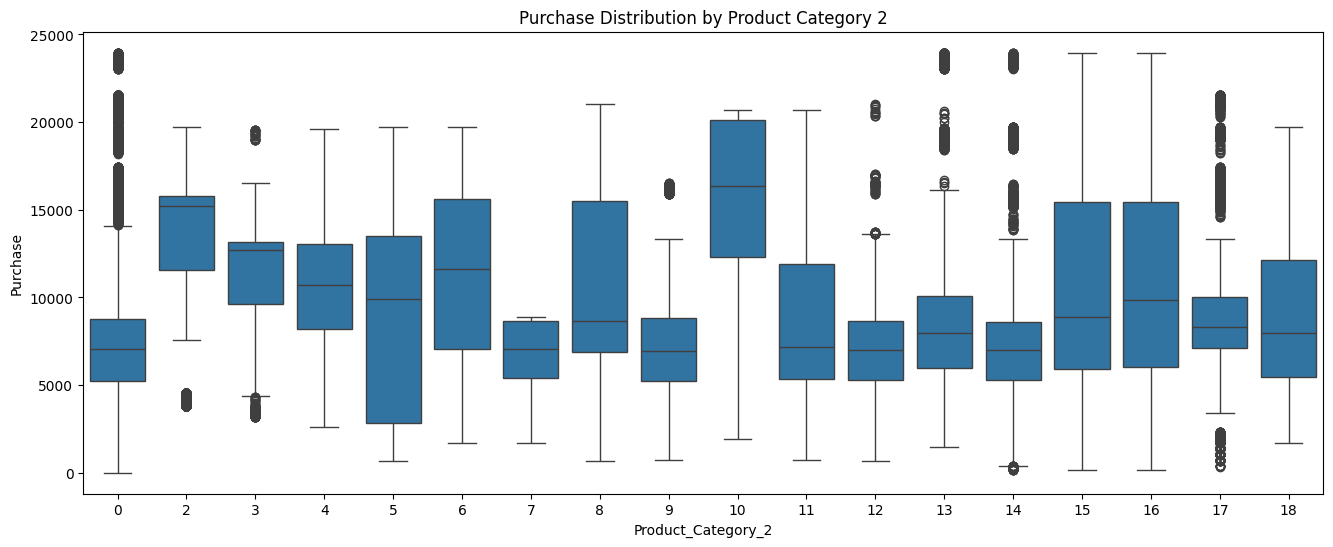

In [ ]:
# Product_category_2 vs Purchased

plt.figure(figsize=(16,6))
sns.boxplot(x='Product_Category_2', y='Purchase', data=df)
plt.title('Purchase Distribution by Product Category 2')
plt.show()

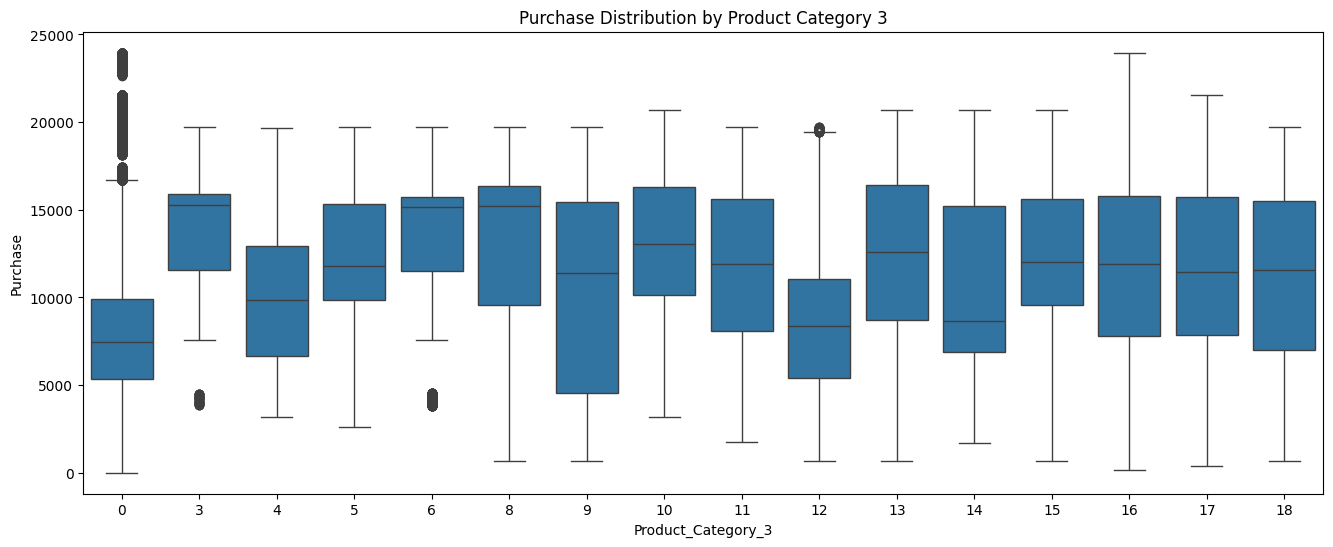

In [ ]:
# Product_category_3 vs Purchased

plt.figure(figsize=(16,6))
sns.boxplot(x='Product_Category_3', y='Purchase', data=df)
plt.title('Purchase Distribution by Product Category 3')
plt.show()

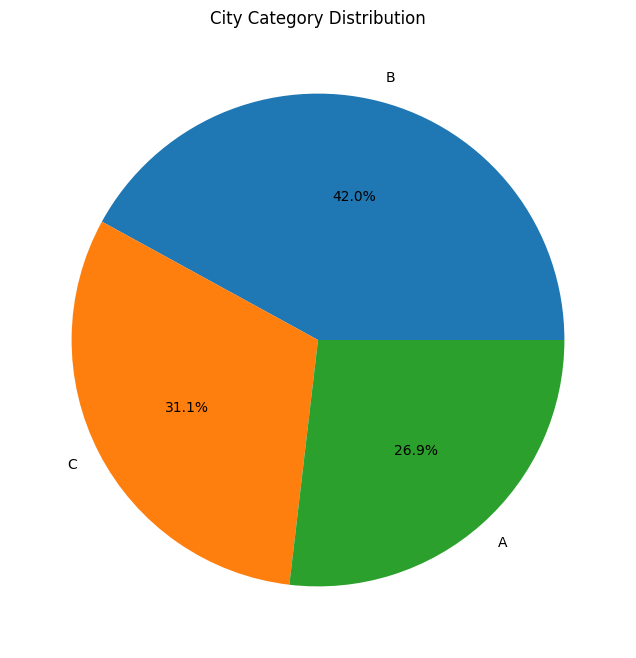

In [ ]:
# City category pie chart
plt.figure(figsize=(8,8))
df['City_Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('City Category Distribution')
plt.ylabel('')
plt.show()

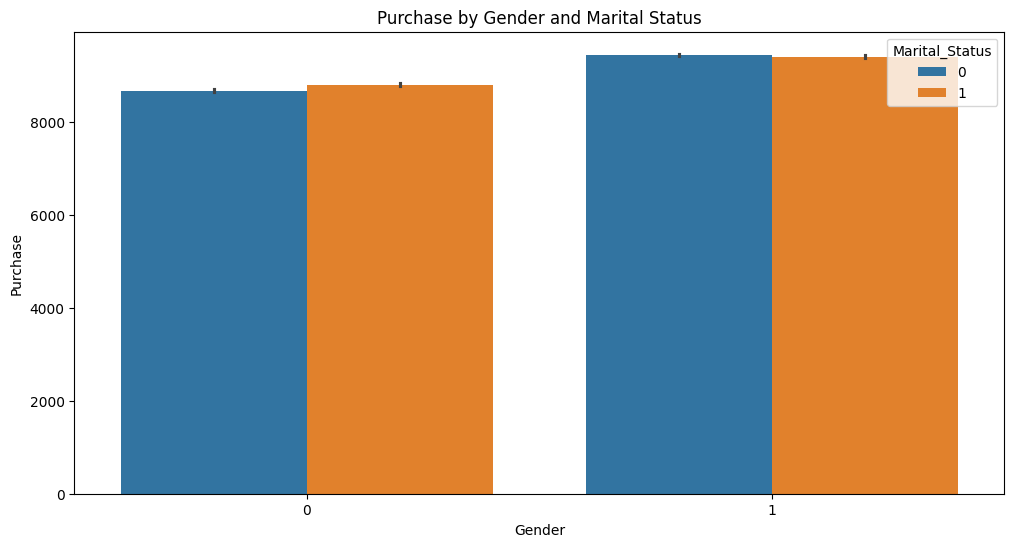

In [ ]:
# check for more possible plots
plt.figure(figsize=(12,6))
sns.barplot(x='Gender', y='Purchase', hue='Marital_Status', data=df)
plt.title('Purchase by Gender and Marital Status')
plt.show()

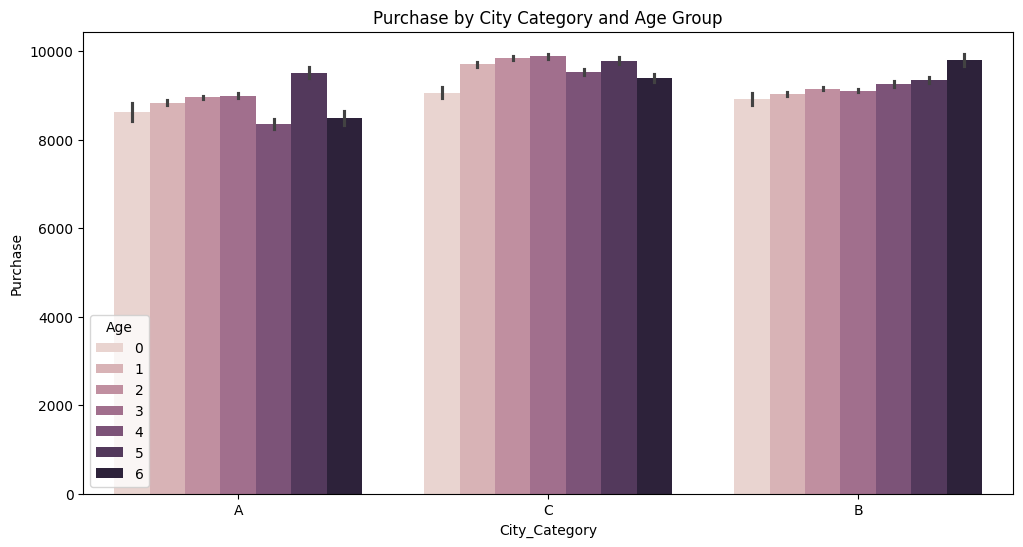

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='City_Category', y='Purchase', hue='Age', data=df)
plt.title('Purchase by City Category and Age Group')
plt.show()

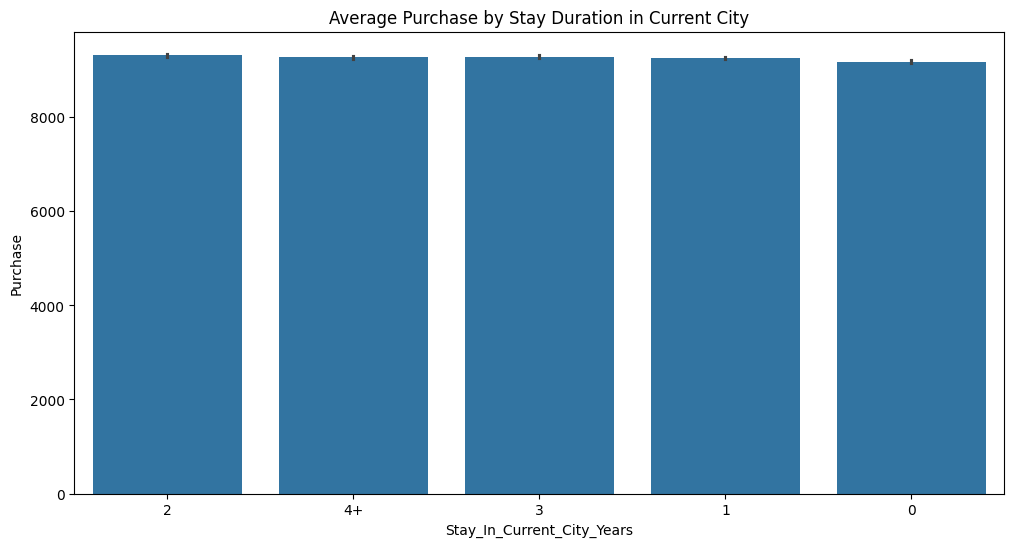

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=df)
plt.title('Average Purchase by Stay Duration in Current City')
plt.show()